In [139]:
pip install pycbc

Note: you may need to restart the kernel to use updated packages.


In [140]:
! pip install lalsuite pycbc

In [141]:
from pycbc.detector import Detector, get_available_detectors
# We can list the available detectors. This gives their detector abbreviation
# along with a longer name. Note that some of these are not physical detectors
# but may be useful for testing or study purposes

for abv in get_available_detectors():
    d = Detector(abv)

    # Note that units are all in radians
    print("{} Latitude {} Longitude {}".format(abv,
                                                  d.latitude,
                                                  d.longitude))
for ifo1 in ['H1', 'L1', 'V1']:
    for ifo2 in ['H1', 'L1', 'V1']:
        dt = Detector(ifo1).light_travel_time_to_detector(Detector(ifo2))
        print("Direct Time from {} to {} is {} seconds".format(ifo1, ifo2, dt))

T1 Latitude 0.6226733602199997 Longitude 2.43536359469
V0 Latitude 0.7615118398400004 Longitude 0.18333805213
V1 Latitude 0.7615118398400004 Longitude 0.18333805213
G1 Latitude 0.9118498275199999 Longitude 0.17116780435
H2 Latitude 0.8107952638300001 Longitude -2.084056769170001
H1 Latitude 0.5061454830783555 Longitude -1.6406094968746698
L1 Latitude 0.8028514559173915 Longitude -2.181661564992913
I1 Latitude 0.24841853020052615 Longitude 1.3340133249409993
C1 Latitude 0.5963790054099999 Longitude -2.0617574453799996
E1 Latitude 0.7615118398400004 Longitude 0.18333805213
E2 Latitude 0.7629930799000002 Longitude 0.1840585887
E3 Latitude 0.7627046325699999 Longitude 0.1819299673
E0 Latitude 0.7627046325699999 Longitude 0.1819299673
K1 Latitude 0.6355068497000002 Longitude 2.396441015
U1 Latitude 0.0 Longitude 0.0
A1 Latitude 0.53079879206 Longitude -1.5913706849599998
O1 Latitude 0.79156499342 Longitude 0.20853775679
X1 Latitude 0.81070543755 Longitude 0.10821041362
N1 Latitude 0.7299645

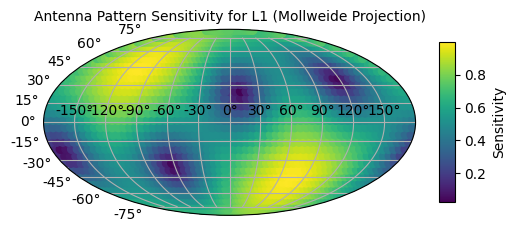

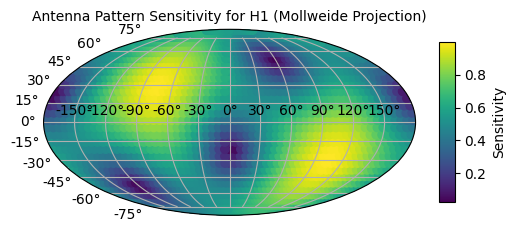

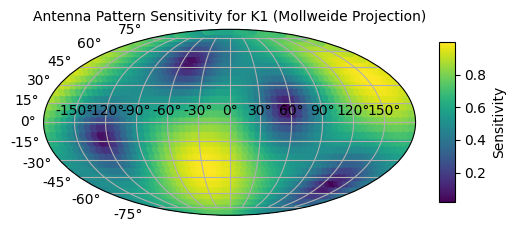

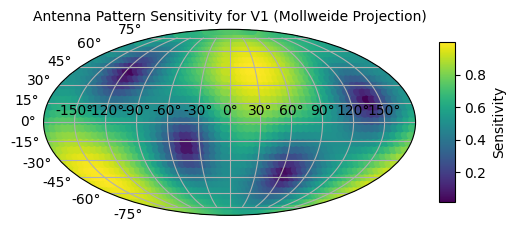

In [142]:
# for single detector

import matplotlib.pyplot as plt
from pycbc.detector import Detector
import numpy as np

ra, dec = np.meshgrid(np.arange(0, np.pi * 2.0, .1), 
                      np.arange(-np.pi / 2.0, np.pi / 2.0, .1))
ra = ra.flatten()
dec = dec.flatten()

pol = 0
t=1e10  

for d in [Detector("L1"), Detector("H1"), Detector("K1"), Detector("V1")]:
    fp, fc = d.antenna_pattern(ra, dec, pol, time)

    plt.figure(figsize=[6, 16])
    ax = plt.subplot(111, projection="mollweide")
    ra[ra > np.pi] -= np.pi * 2.0
    scatter = ax.scatter(ra, dec, c=np.sqrt(fp**2.0 + fc**2.0), cmap='viridis')
    ax.grid(True)
    plt.title(f'Antenna Pattern Sensitivity for {d.name} (Mollweide Projection)', fontsize = 10)
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.13, aspect=10, pad=0.05)
    cbar.set_label('Sensitivity',fontsize = 10)
    plt.show()


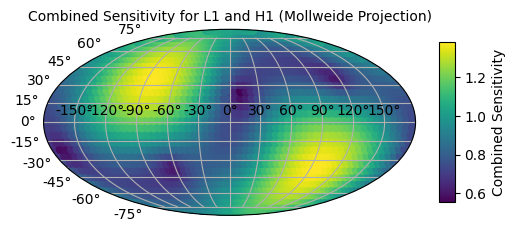

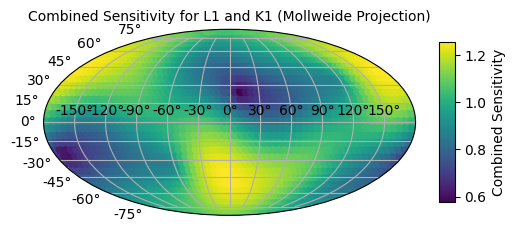

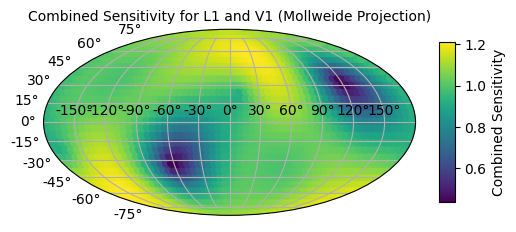

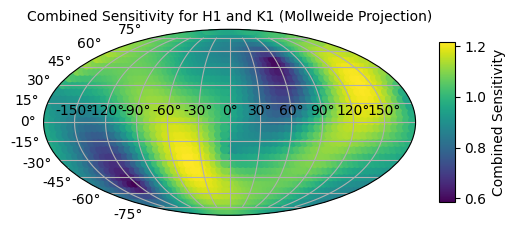

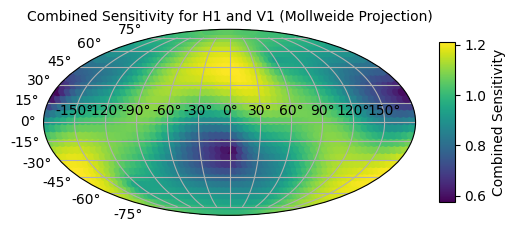

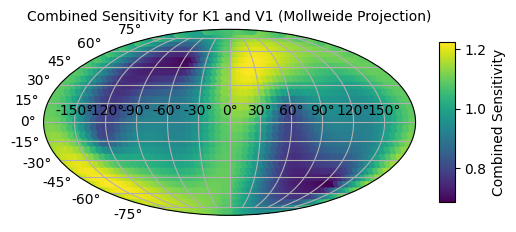

In [143]:
# all combinations of pairs of detectors

from itertools import combinations
detectors_list = [Detector("L1"), Detector("H1"), Detector("K1"), Detector("V1")]

detector_combinations = list(combinations(detectors_list, 2))

for pair in detector_combinations:
    sensitivity_combined = np.zeros(len(ra))  

    for d in pair:
        fp, fc = d.antenna_pattern(ra, dec, pol, time)
        sensitivity = np.sqrt(fp**2.0 + fc**2.0)      
        sensitivity_combined += sensitivity**2
        sensitivity_combined = np.sqrt(sensitivity_combined)

    ra[ra > np.pi] -= np.pi * 2.0
    plt.figure(figsize=[6, 16])
    ax = plt.subplot(111, projection="mollweide")
    scatter = ax.scatter(ra, dec, c=sensitivity_combined, cmap='viridis')
    ax.grid(True)
    title = f'Combined Sensitivity for {pair[0].name} and {pair[1].name} (Mollweide Projection)'
    plt.title(title, fontsize =10)
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.13, aspect=10, pad=0.05)
    cbar.set_label('Combined Sensitivity')
    plt.show()


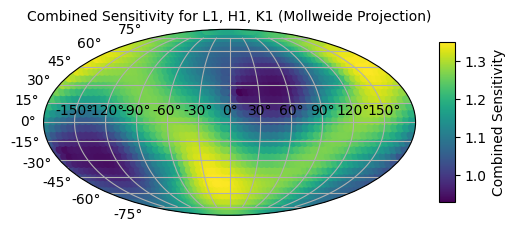

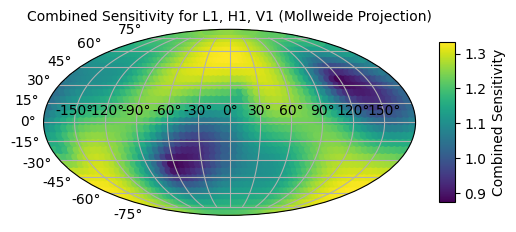

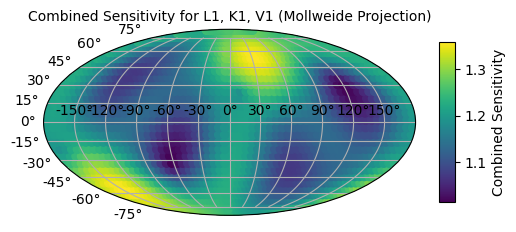

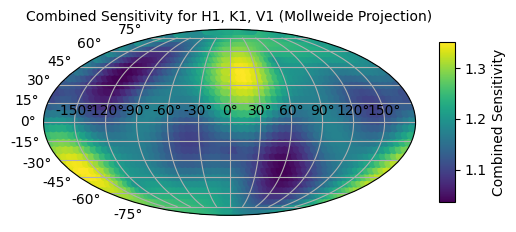

In [144]:
# all combinations of triplets of detectors

detectors_list = [Detector("L1"), Detector("H1"), Detector("K1"), Detector("V1")]
detector_combinations = list(combinations(detectors_list, 3))

for triplet in detector_combinations:
    sensitivity_combined = np.zeros(len(ra))  
    
    for d in triplet:
        fp, fc = d.antenna_pattern(ra, dec, pol, time)
        sensitivity = np.sqrt(fp**2.0 + fc**2.0)
        sensitivity_combined += sensitivity**2
        sensitivity_combined = np.sqrt(sensitivity_combined)
    # Adjust RA for the Mollweide projection
    ra[ra > np.pi] -= np.pi * 2.0
    plt.figure(figsize=[6, 16])
    ax = plt.subplot(111, projection="mollweide")
    scatter = ax.scatter(ra, dec, c=sensitivity_combined, cmap='viridis')
    ax.grid(True)
    title = f'Combined Sensitivity for {", ".join([d.name for d in triplet])} (Mollweide Projection)'
    plt.title(title,fontsize =10)
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.13, aspect=10, pad=0.05)
    cbar.set_label('Combined Sensitivity')
    plt.show()


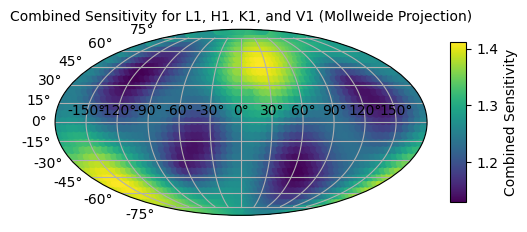

In [145]:
# for the combination of all four detectors

detectors_list = [Detector("L1"), Detector("H1"), Detector("K1"), Detector("V1")]
sensitivity_combined = np.zeros(len(ra))  

for d in detectors_list:
    fp, fc = d.antenna_pattern(ra, dec, pol, time)
    sensitivity = np.sqrt(fp**2.0 + fc**2.0)
    sensitivity_combined += sensitivity**2
    sensitivity_combined = np.sqrt(sensitivity_combined)
    
ra[ra > np.pi] -= np.pi * 2.0
plt.figure(figsize=[6, 16])
ax = plt.subplot(111, projection="mollweide")
scatter = ax.scatter(ra, dec, c=sensitivity_combined, cmap='viridis')
ax.grid(True)
plt.title(f'Combined Sensitivity for L1, H1, K1, and V1 (Mollweide Projection)',fontsize =10)
cbar = plt.colorbar(scatter, ax=ax, shrink=0.13, aspect=10, pad=0.05)
cbar.set_label('Combined Sensitivity')
plt.show()
